In [ ]:
# Uncomment when importing from GitHub
# !git clone https://www.github.com/simoneroncallo/quantum-optical-neuron.git
# %cd /content/quantum-optical-neuron
# !mkdir ./output/data

# Uncomment when importing from Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/'Colab Notebooks'/quantum-optical-neuron

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/quantum-optical-neuron


In [ ]:
import sys

# Uncomment when importing from GitHub
# dir = '/content/quantum-optical-neuron'

# Uncomment when importing from Google Drive
# dir = '/content/drive/MyDrive/"Colab Notebooks"/quantum-optical-neuron'

sys.path.append(dir)
from qon import sig, sigPrime
from qon import neuron, loss, accuracy
from qon import spatial_loss_derivative, Fourier_loss_derivative
from qon import update_rule, optimization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models, activations, optimizers
from keras.datasets import cifar10
from keras.utils import set_random_seed

In [ ]:
def rgb2gray(rgb):
  """ Convert an RGB digital image to greyscale. """
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [ ]:
# Set the seeds
np.random.seed(2024)
set_random_seed(2024)

In [ ]:
# Hyperparameters
numEpochs = 150
learningRateWeights = 0.075
learningRateBias = 0.005

# Dataset
We use the CIFAR-10 dataset, which contains $32 \times 32$ color images, distributed across $10$ different classes. We guaranteed a fair comparison by converting each image to greyscale. We train the models to distinguish among images of *cats* and *dogs*.

After normalization, each element of the dataset is identified with the corrisponding amplitudes of quantum optical neuron input state, bypassing the simulation of the imaging apparatus.

In [ ]:
# Load the CIFAR dataset
(trainImgs, trainLabels), (testImgs, testLabels) = cifar10.load_data()

# Filter dogs and planes from the the dataset
trainCats, testCats = np.where(trainLabels == 3), np.where(testLabels == 3)
trainDogs, testDogs = np.where(trainLabels == 5), np.where(testLabels == 5)

trainCatImgs = trainImgs[trainCats[0]]
trainDogImgs = trainImgs[trainDogs[0]]

testCatImgs = testImgs[testCats[0]]
testDogImgs = testImgs[testDogs[0]]

trainImgs = np.concatenate((trainCatImgs, trainDogImgs), axis = 0)
testImgs = np.concatenate((testCatImgs, testDogImgs), axis = 0)

# Assign 0 to cats and 1 to dogs
trainCatLabels = np.zeros(trainCatImgs.shape[0])
trainDogLabels = np.ones(trainDogImgs.shape[0])
trainLabels = np.concatenate((trainCatLabels, trainDogLabels), axis = 0)

testCatLabels = np.zeros(testCatImgs.shape[0])
testDogLabels = np.ones(testDogImgs.shape[0])
testLabels = np.concatenate((testCatLabels, testDogLabels), axis = 0)

# Reshuffle images and labels consistently
idxs = np.arange(trainImgs.shape[0])
np.random.shuffle(idxs)

trainImgs = trainImgs[idxs]
trainLabels = trainLabels[idxs]

# Convert to float
trainImgs = trainImgs.astype(np.float64)
testImgs = testImgs.astype(np.float64)
trainLabels = trainLabels.astype(np.float64)
testLabels = testLabels.astype(np.float64)

## Identify each image to the discretized amplitudes of the single-photon state
for idx, trainImg in enumerate(trainImgs):
  trainImg = rgb2gray(trainImg)
  trainImgs[idx,:,:,0] = trainImg/np.sum(trainImg) # Normalization
  if idx < testImgs.shape[0]:
    testImg = rgb2gray(testImgs[idx,:,:,:])
    testImgs[idx,:,:,0] = testImg/np.sum(testImg) # Normalization

# Amplitudes
trainImgs = np.sqrt(trainImgs[:,:,:,0])
testImgs = np.sqrt(testImgs[:,:,:,0])

print('Training set has shape', trainImgs.shape)

170498071/170498071 [==============================] - 4s 0us/step
Training set has shape (10000, 32, 32)


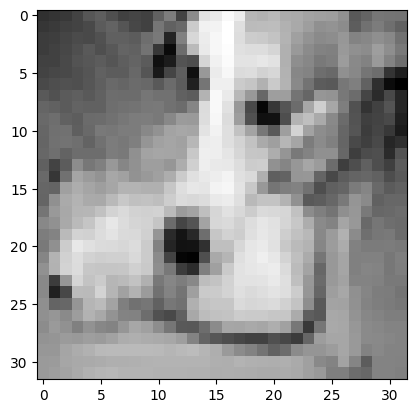

In [ ]:
# Print example
idx = 10
plt.imshow(np.square(trainImgs[idx,:,:]))
plt.gray()
plt.show()

# <font color='ORANGE'>Simulation</font>
 We numerically compare the predictability of the quantum optical neuron against that of conventional neural network designs, constrained to the same number of parameters.

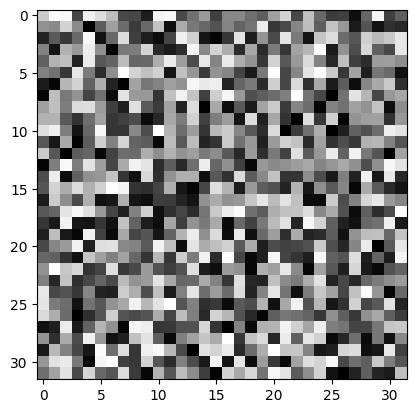

In [ ]:
# Parameters random initialization
initial_weights = np.random.uniform(-1,1,(32,32)) # Uniform sampling
bias = 0

# Normalization
norm = np.sum(np.square(initial_weights))
weights = initial_weights/np.sqrt(norm)

plt.imshow(weights[:,:])
plt.gray()

In [ ]:
# Training
weights, bias, loss_history, test_loss_history, accuracy_history,\
              test_accuracy_history = optimization(spatial_loss_derivative,\
                weights, bias, trainLabels, testLabels, trainImgs, testImgs,\
                  numEpochs, learningRateWeights, learningRateBias)

EPOCH 0
Loss 2.739044759478439 Val_Loss 2.73901845451168
Accuracy 0.5 Val_Acc 0.5
---
EPOCH 1
Loss 2.5596125632798263 Val_Loss 2.55951700161007
Accuracy 0.5 Val_Acc 0.5
---
EPOCH 2
Loss 2.3190714690040104 Val_Loss 2.3187762385428945
Accuracy 0.5 Val_Acc 0.5
---
EPOCH 3
Loss 1.9094410007148312 Val_Loss 1.9085898999128004
Accuracy 0.5 Val_Acc 0.5
---
EPOCH 4
Loss 1.1691954502044208 Val_Loss 1.1671014859954387
Accuracy 0.5 Val_Acc 0.5
---
EPOCH 5
Loss 0.7030107334262916 Val_Loss 0.700977005602301
Accuracy 0.5124 Val_Acc 0.524
---
EPOCH 6
Loss 0.6989908022273206 Val_Loss 0.696624430992015
Accuracy 0.5055 Val_Acc 0.5115
---
EPOCH 7
Loss 0.6958099661906726 Val_Loss 0.6937163800472286
Accuracy 0.5142 Val_Acc 0.5275
---
EPOCH 8
Loss 0.6938138801312485 Val_Loss 0.6915575650283498
Accuracy 0.5241 Val_Acc 0.537
---
EPOCH 9
Loss 0.6922353480266029 Val_Loss 0.690133446156061
Accuracy 0.5235 Val_Acc 0.5355
---
EPOCH 10
Loss 0.6911136757076457 Val_Loss 0.6889390741290496
Accuracy 0.5324 Val_Acc 0.545

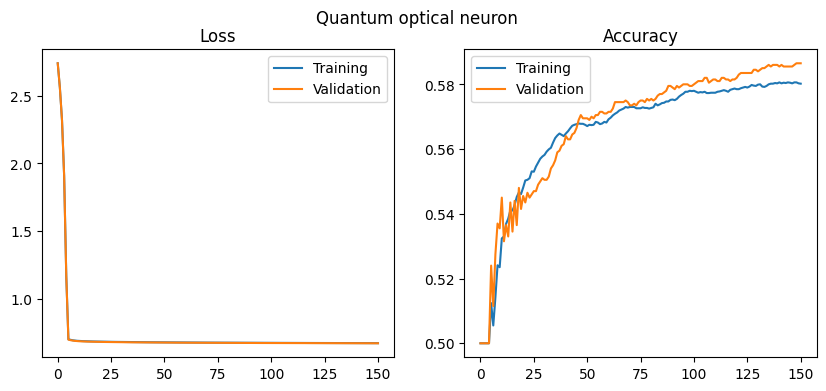

In [ ]:
# History plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(loss_history, label = 'Training')
ax1.plot(test_loss_history, label = 'Validation')

ax1.set_title('Loss')
ax1.legend()

ax2.plot(accuracy_history, label = 'Training')
ax2.plot(test_accuracy_history, label = 'Validation')

ax2.set_title('Accuracy')
ax2.legend()

fig.suptitle('Quantum optical neuron')
plt.show()

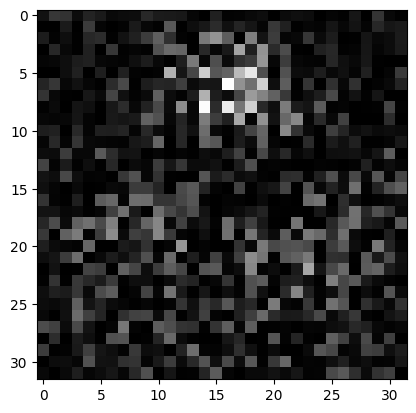

In [ ]:
# Parameters plot
# Normalization
norm = np.sum(np.square(weights))
weights = weights/np.sqrt(norm)

probWeights = np.square(weights)

plt.imshow(probWeights)
plt.gray()

plt.show()

### Single neuron

In [ ]:
model = models.Sequential()

model.add(layers.Flatten(input_shape=(32, 32, 1)))
model.add(layers.Dense(1, activation='sigmoid', use_bias=True))

model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = optimizers.SGD(learning_rate = learningRateWeights)
model.compile(optimizer=optimizer, loss='binary_crossentropy', \
              metrics=['accuracy'])
dense_history = model.fit(trainImgs, trainLabels, \
                    batch_size = trainImgs.shape[0], \
                    epochs = numEpochs,
                    validation_data=(testImgs, testLabels))

Epoch 1/150
1/1 [==============================] - 1s 813ms/step - loss: 0.6930 - accuracy: 0.5174 - val_loss: 0.6931 - val_accuracy: 0.5065
Epoch 2/150
1/1 [==============================] - 0s 82ms/step - loss: 0.6929 - accuracy: 0.5168 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 3/150
1/1 [==============================] - 0s 82ms/step - loss: 0.6929 - accuracy: 0.5174 - val_loss: 0.6931 - val_accuracy: 0.5035
Epoch 4/150
1/1 [==============================] - 0s 73ms/step - loss: 0.6929 - accuracy: 0.5181 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/150
1/1 [==============================] - 0s 75ms/step - loss: 0.6929 - accuracy: 0.5185 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/150
1/1 [==============================] - 0s 86ms/step - loss: 0.6929 - accuracy: 0.5176 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 7/150
1/1 [==============================] - 0s 82ms/step - loss: 0.6929 - accuracy: 0.5178 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 8/150
1/1 [==

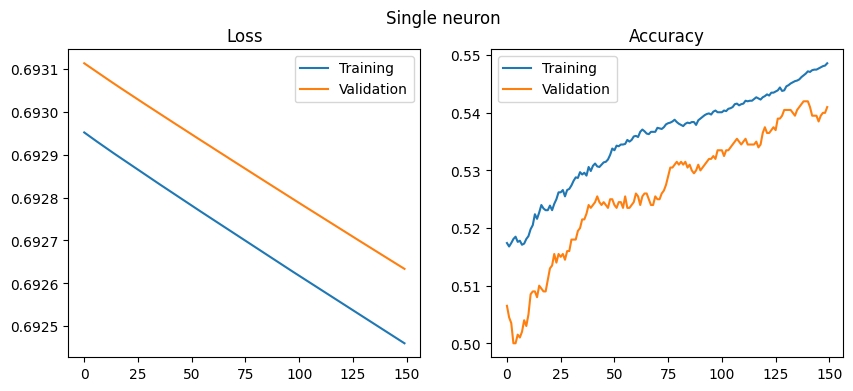

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(dense_history.history['loss'], label = 'Training')
ax1.plot(dense_history.history['val_loss'], label = 'Validation')

ax1.set_title('Loss')
ax1.legend()

ax2.plot(dense_history.history['accuracy'], label = 'Training')
ax2.plot(dense_history.history['val_accuracy'], label = 'Validation')

ax2.set_title('Accuracy')
ax2.legend()

fig.suptitle('Single neuron')
plt.show()

### Convolutional network

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(10, (3, 3), activation='linear', use_bias=False, \
                        input_shape=(32, 32, 1)))
model.add(layers.Conv2D(4, (2, 2), activation='linear', use_bias=False))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid', use_bias=True))

model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 10)        90        
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 4)         160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 4)         0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 785       
                                                                 
Total params: 1035 (4.04 KB)
Trainable params: 1035 (4.04 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [ ]:
optimizer = optimizers.SGD(learning_rate = learningRateWeights)
model.compile(optimizer=optimizer, loss='binary_crossentropy', \
              metrics=['accuracy'])
conv_history = model.fit(trainImgs, trainLabels, \
                    batch_size = trainImgs.shape[0], \
                    epochs = numEpochs,
                    validation_data=(testImgs, testLabels))

Epoch 1/150
1/1 [==============================] - 6s 6s/step - loss: 0.6931 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/150
1/1 [==============================] - 4s 4s/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/150
1/1 [==============================] - 4s 4s/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/150
1/1 [==============================] - 5s 5s/step - loss: 0.6931 - accuracy: 0.5008 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/150
1/1 [==============================] - 4s 4s/step - loss: 0.6931 - accuracy: 0.5009 - val_loss: 0.6930 - val_accuracy: 0.4995
Epoch 6/150
1/1 [==============================] - 4s 4s/step - loss: 0.6931 - accuracy: 0.5009 - val_loss: 0.6930 - val_accuracy: 0.4995
Epoch 7/150
1/1 [==============================] - 5s 5s/step - loss: 0.6931 - accuracy: 0.5009 - val_loss: 0.6930 - val_accuracy: 0.4995
Epoch 8/150
1/1 [=================

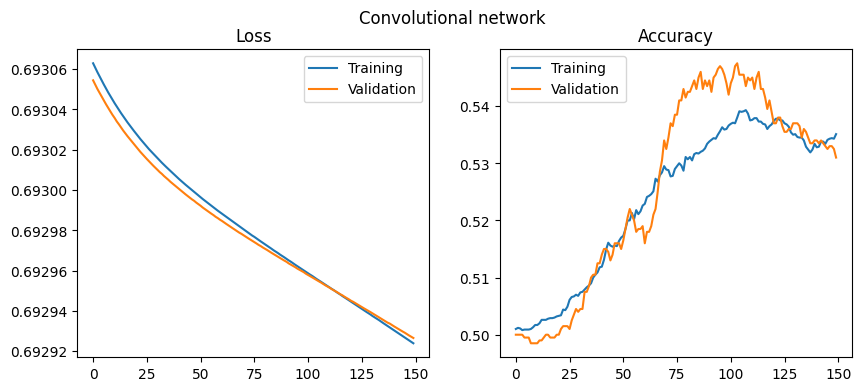

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(conv_history.history['loss'], label = 'Training')
ax1.plot(conv_history.history['val_loss'], label = 'Validation')

ax1.set_title('Loss')
ax1.legend()

ax2.plot(conv_history.history['accuracy'], label = 'Training')
ax2.plot(conv_history.history['val_accuracy'], label = 'Validation')

ax2.set_title('Accuracy')
ax2.legend()

fig.suptitle('Convolutional network')
plt.show()

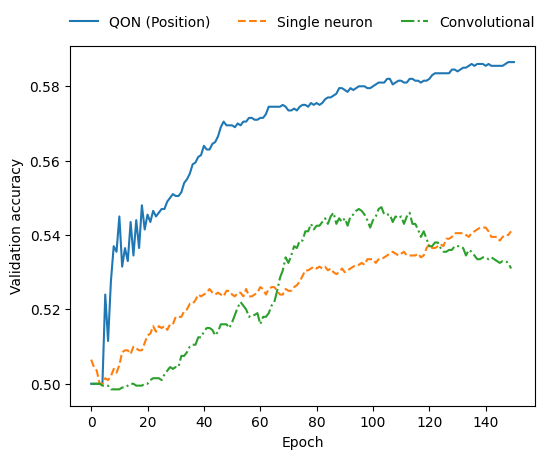

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 5.5))

# Main plot
ax1.plot(test_accuracy_history, linestyle = '-', \
         label = 'QON (Position)')

ax1.plot(dense_history.history['val_accuracy'], linestyle = '--', \
         label = 'Single neuron')

ax1.plot(conv_history.history['val_accuracy'], linestyle = '-.', \
         label = 'Convolutional')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation accuracy')

pos = ax1.get_position()
ax1.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
ax1.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),
    ncol=3,
    frameon=False,
)

plt.show()

In [ ]:
# Quantum optical neuron history
np.save('output/data/CIFARposition_OQPloss.npy', test_loss_history)
np.save('output/data/CIFARposition_OQPacc.npy', test_accuracy_history)

# Single neuron history
np.save('output/data/CIFARposition_MLPloss.npy', \
          np.array(dense_history.history['val_loss']))
np.save('output/data/CIFARposition_MLPacc.npy', \
          np.array(dense_history.history['val_accuracy']))

# Convolutional network history
np.save('output/data/CIFARposition_CONVloss.npy', \
          np.array(conv_history.history['val_loss']))
np.save('output/data/CIFARposition_CONVacc.npy', \
          np.array(conv_history.history['val_accuracy']))

# <font color='ORANGE'>Simulation</font> (Fourier encoding)
We repeat the same analysis and comparisons by encoding the dataset in the Fourier domain.

In [ ]:
# Reinitialize the Tensorflow seed
set_random_seed(2024)

In [ ]:
# Compute the fast Fourier transform
trainFourierImgs = np.zeros(trainImgs.shape, dtype = np.complex64)
testFourierImgs = np.zeros(testImgs.shape, dtype = np.complex64)

for idx, trainImg in enumerate(trainImgs):
  trainFourierImgs[idx,:,:] = np.transpose(np.fft.fftshift(\
                          np.fft.fft2(trainImgs[idx,:,:], norm = "ortho")))
  if idx < testImgs.shape[0]:
    testFourierImgs[idx,:,:] = np.transpose(np.fft.fftshift(\
                          np.fft.fft2(testImgs[idx,:,:],  norm = "ortho")))

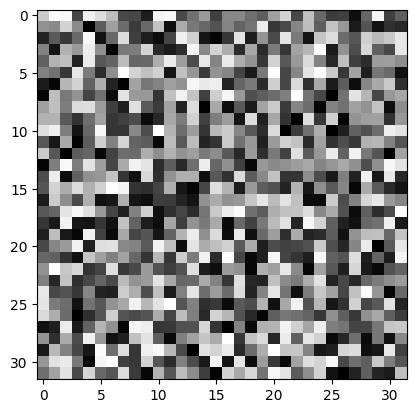

In [ ]:
# Parameters reinizialization and normalization
bias = 0
norm = np.sum(np.square(initial_weights))
weights = initial_weights/np.sqrt(norm)

plt.imshow(weights[:,:])
plt.gray()

In [ ]:
# Training
weights, bias, loss_history, test_loss_history, accuracy_history,\
        test_accuracy_history = optimization(Fourier_loss_derivative,\
          weights, bias, trainLabels, testLabels, trainFourierImgs,\
            testFourierImgs, numEpochs, learningRateWeights, learningRateBias)

EPOCH 0
Loss 2.7534762121997725 Val_Loss 2.7534999623346503
Accuracy 0.5 Val_Acc 0.5
---
EPOCH 1
Loss 2.6041437127777334 Val_Loss 2.604145639262866
Accuracy 0.5 Val_Acc 0.5
---
EPOCH 2
Loss 2.4542160575603655 Val_Loss 2.4541813495212246
Accuracy 0.5 Val_Acc 0.5
---
EPOCH 3
Loss 2.300930509146811 Val_Loss 2.300827218721639
Accuracy 0.5 Val_Acc 0.5
---
EPOCH 4
Loss 2.135469083472913 Val_Loss 2.1352289146687835
Accuracy 0.5 Val_Acc 0.5
---
EPOCH 5
Loss 1.9318326906653946 Val_Loss 1.9313062884304757
Accuracy 0.5 Val_Acc 0.5
---
EPOCH 6
Loss 1.6225589800602684 Val_Loss 1.6214322197181033
Accuracy 0.5 Val_Acc 0.5
---
EPOCH 7
Loss 1.1055980039236797 Val_Loss 1.103486030989563
Accuracy 0.5 Val_Acc 0.5
---
EPOCH 8
Loss 0.6966670200194802 Val_Loss 0.6950966591716035
Accuracy 0.5051 Val_Acc 0.5085
---
EPOCH 9
Loss 0.6956245893172672 Val_Loss 0.6942325230427332
Accuracy 0.5046 Val_Acc 0.511
---
EPOCH 10
Loss 0.6948511792158725 Val_Loss 0.693342677170035
Accuracy 0.5078 Val_Acc 0.5125
---
EPOCH 11


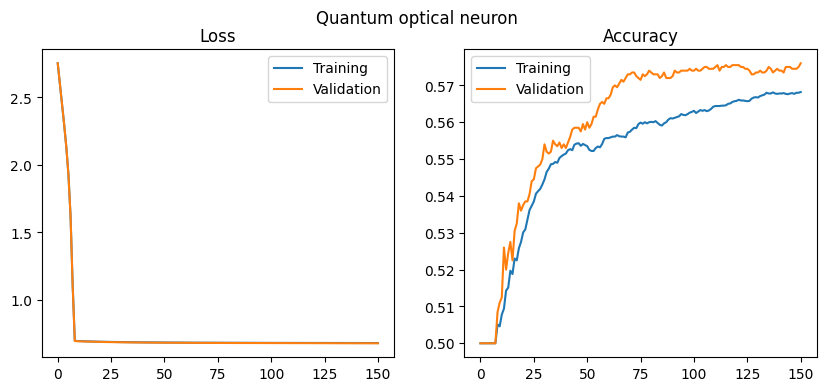

In [ ]:
# History plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(loss_history, label = 'Training')
ax1.plot(test_loss_history, label = 'Validation')

ax1.set_title('Loss')
ax1.legend()

ax2.plot(accuracy_history, label = 'Training')
ax2.plot(test_accuracy_history, label = 'Validation')

ax2.set_title('Accuracy')
ax2.legend()

fig.suptitle('Quantum optical neuron')
plt.show()

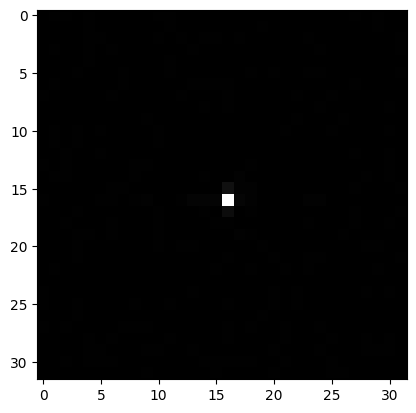

In [ ]:
# Parameters plot
# Normalization
norm = np.sum(np.square(weights))
weights = weights/np.sqrt(norm)

probWeights = np.square(weights)

plt.imshow(probWeights)
plt.gray()

plt.show()

### Single neuron

In [ ]:
model = models.Sequential()

model.add(layers.Flatten(input_shape=(32, 32, 1)))
model.add(layers.Dense(1, activation='sigmoid', use_bias=True))

model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = optimizers.SGD(learning_rate = learningRateWeights)
model.compile(optimizer=optimizer, loss='binary_crossentropy', \
              metrics=['accuracy'])
dense_history = model.fit(np.abs(trainFourierImgs), trainLabels, \
                    batch_size = trainImgs.shape[0], \
                    epochs = numEpochs,
                    validation_data=(np.abs(testFourierImgs), testLabels))

Epoch 1/150
1/1 [==============================] - 1s 646ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/150
1/1 [==============================] - 0s 71ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/150
1/1 [==============================] - 0s 79ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 4/150
1/1 [==============================] - 0s 79ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/150
1/1 [==============================] - 0s 80ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 6/150
1/1 [==============================] - 0s 68ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/150
1/1 [==============================] - 0s 73ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 8/150
1/1 [==

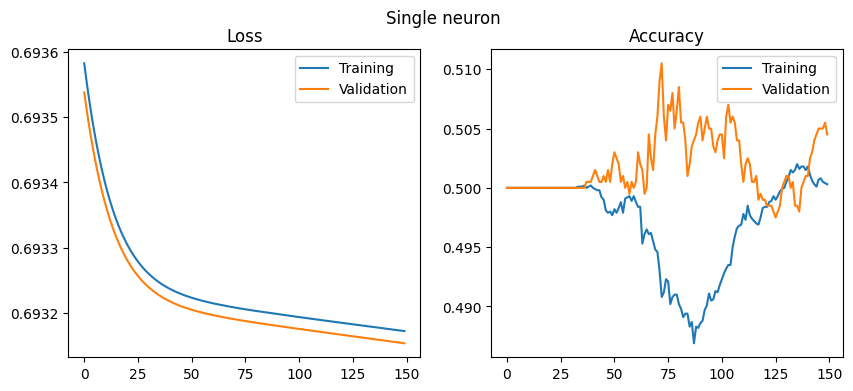

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(dense_history.history['loss'], label = 'Training')
ax1.plot(dense_history.history['val_loss'], label = 'Validation')

ax1.set_title('Loss')
ax1.legend()

ax2.plot(dense_history.history['accuracy'], label = 'Training')
ax2.plot(dense_history.history['val_accuracy'], label = 'Validation')

ax2.set_title('Accuracy')
ax2.legend()

fig.suptitle('Single neuron')
plt.show()

### Convolutional network

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(10, (3, 3), activation='linear', use_bias=False, \
                        input_shape=(32, 32, 1)))
model.add(layers.Conv2D(4, (2, 2), activation='linear', use_bias=False))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid', use_bias=True))

model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 10)        90        
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 4)         160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 4)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 785       
                                                                 
Total params: 1035 (4.04 KB)
Trainable params: 1035 (4.04 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [ ]:
optimizer = optimizers.SGD(learning_rate = learningRateWeights)
model.compile(optimizer=optimizer, loss='binary_crossentropy', \
              metrics=['accuracy'])
conv_history = model.fit(np.abs(trainFourierImgs), trainLabels, \
                    batch_size = trainImgs.shape[0], \
                    epochs = numEpochs,
                    validation_data=(np.abs(testFourierImgs), testLabels))

Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/150
1/1 [==============================] - 4s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/150
1/1 [==============================] - 6s 6s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/150
1/1 [==============================] - 4s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/150
1/1 [==============================] - 4s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/150
1/1 [==============================] - 5s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/150
1/1 [==============================] - 4s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/150
1/1 [=================

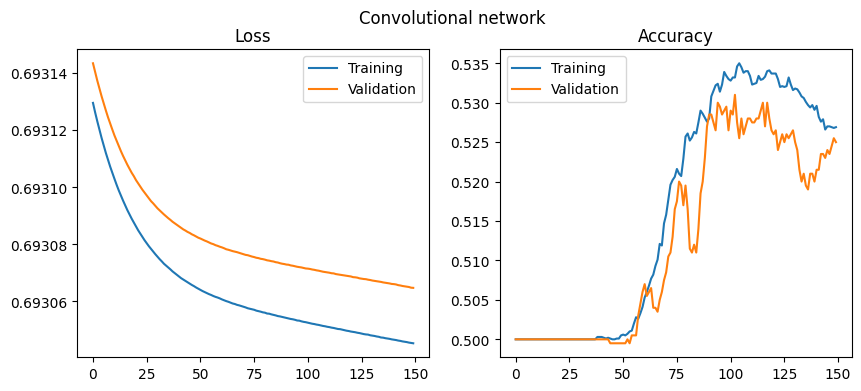

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(conv_history.history['loss'], label = 'Training')
ax1.plot(conv_history.history['val_loss'], label = 'Validation')

ax1.set_title('Loss')
ax1.legend()

ax2.plot(conv_history.history['accuracy'], label = 'Training')
ax2.plot(conv_history.history['val_accuracy'], label = 'Validation')

ax2.set_title('Accuracy')
ax2.legend()

fig.suptitle('Convolutional network')
plt.show()

## Comparison

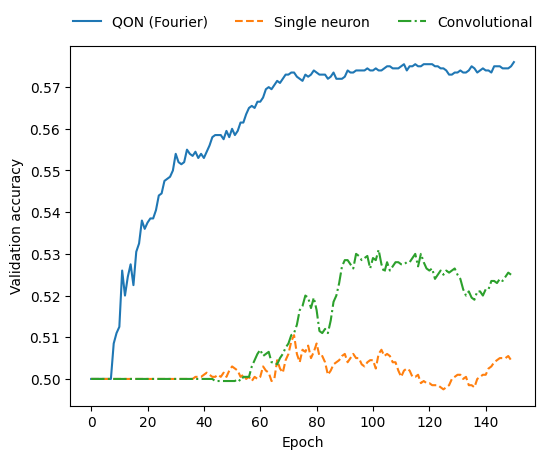

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 5.5))

# Main plot
ax1.plot(test_accuracy_history, linestyle = '-', \
         label = 'QON (Fourier)')

ax1.plot(dense_history.history['val_accuracy'], linestyle = '--', \
         label = 'Single neuron')

ax1.plot(conv_history.history['val_accuracy'], linestyle = '-.', \
         label = 'Convolutional')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation accuracy')

pos = ax1.get_position()
ax1.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
ax1.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),
    ncol=3,
    frameon=False,
)

plt.show()

In [ ]:
# Quantum optical neuron history
np.save('output/data/CIFARfourier_OQPloss.npy', test_loss_history)
np.save('output/data/CIFARfourier_OQPacc.npy', test_accuracy_history)

# Single neuron history
np.save('output/data/CIFARfourier_MLPloss.npy', \
          np.array(dense_history.history['val_loss']))
np.save('output/data/CIFARfourier_MLPacc.npy', \
          np.array(dense_history.history['val_accuracy']))

# Convolutional network history
np.save('output/data/CIFARfourier_CONVloss.npy', \
          np.array(conv_history.history['val_loss']))
np.save('output/data/CIFARfourier_CONVacc.npy', \
          np.array(conv_history.history['val_accuracy']))